In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime, timedelta

In [2]:
#Create a SQLite connection
conn = sqlite3.connect('ReportAufrufe.sqlite')
print(conn.table())

# Load data from the 'my_table' table into a Pandas DataFrame
df = pd.read_sql_query('SELECT * FROM ReportAufrufe', conn)
# Close the SQLite connection
conn.close()


In [3]:

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
two_weeks_ago = datetime.now() - timedelta(days=14)
df_last_two_weeks = df[df['TimeStamp'] >= two_weeks_ago]
counts = df_last_two_weeks['Report'].value_counts().nlargest(10)


In [4]:
current_timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

# Name des PDF-Dateinamens mit Zeitstempel
pdf_filename = f"ReportAufrufe_{current_timestamp}.pdf"
pdf_pages = PdfPages(pdf_filename)

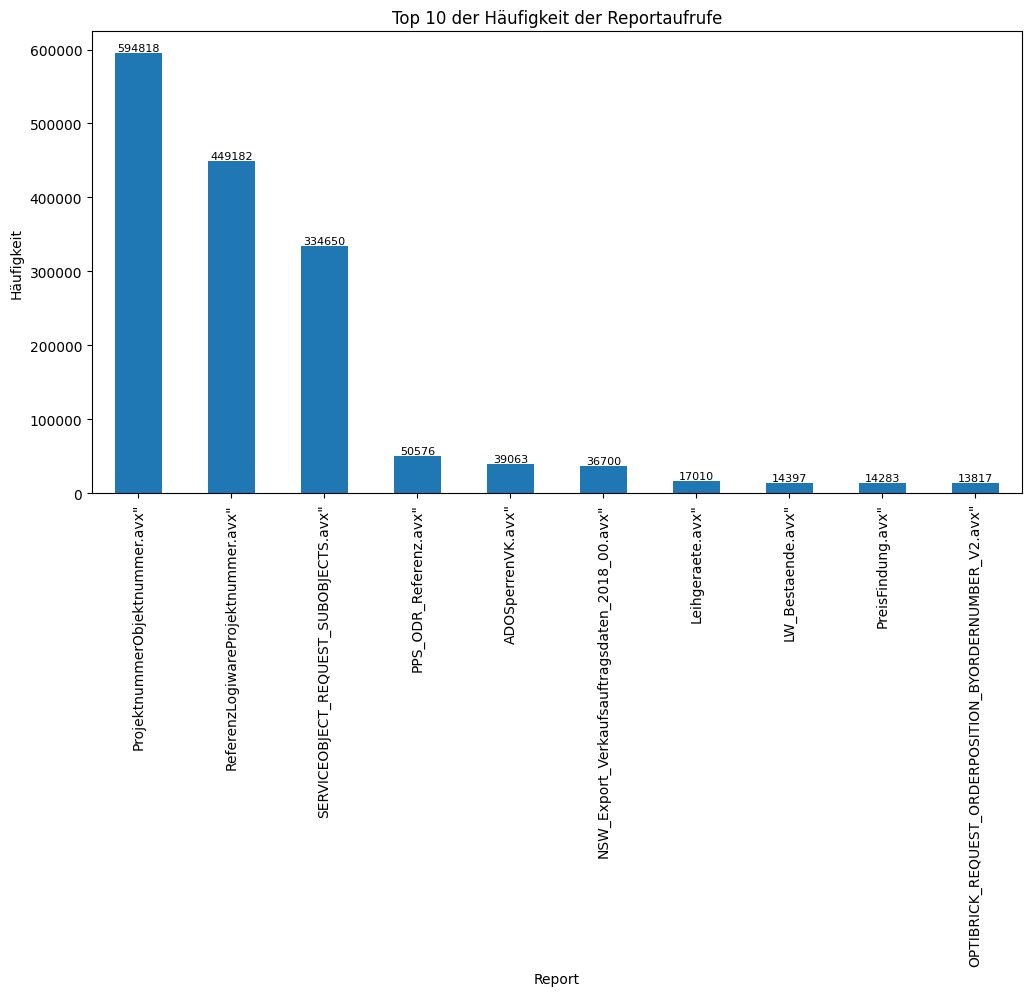

In [5]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))  # Breite von 12 Zoll, Höhe von 6 Zoll
counts.plot(kind='bar', ax=ax)

# Füge Titel und Achsenbeschriftungen hinzu
ax.set_title('Top 10 der Häufigkeit der Reportaufrufe')
ax.set_xlabel('Report')
ax.set_ylabel('Häufigkeit')

# Beschriftungen der Bars anpassen
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

# Achsenbeschriftungen anpassen
ax.tick_params(axis='x', labelrotation=90, labelsize=10)  # Rotiere und verkleinere die x-Achsenbeschriftungen

# Plot zum PDF hinzufügen
pdf_pages.savefig(fig, bbox_inches='tight')


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Nur das Datum extrahieren
df_last_two_weeks['Date'] = df_last_two_weeks['TimeStamp'].dt.date

# Gruppieren nach Report und Datum und zählen
df_grouped = df_last_two_weeks.groupby([df_last_two_weeks['Report'], df_last_two_weeks['Date']]).size().reset_index(name='count')

# Top 10 Berichte auswählen
top_10_reports = df_grouped.groupby('Report').sum().nlargest(10, 'count').index.values
df_top_10 = df_grouped[df_grouped['Report'].isin(top_10_reports)]
unique_reports = df_top_10['Report'].unique().tolist()

# Nach Gesamtzählungen sortieren
df_top_10_sorted = df_top_10.groupby('Report').sum().sort_values('count', ascending=False).reset_index()


# Schleife über die Berichte und Erstellung der Plots
for report in df_top_10_sorted['Report']:
    # DataFrame für den aktuellen Bericht erstellen
    df_report = df_top_10[df_top_10['Report'] == report]
    
    # Plot erstellen
    fig, ax = plt.subplots(figsize=(12, 6))  # Breite von 12 Zoll, Höhe von 6 Zoll
    df_report.plot.bar(x='Date', y='count', title=report, rot=45, ax=ax)
    
    # Beschriftungen hinzufügen
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=8)
    
    plt.tight_layout()
    
    # Plot zum PDF hinzufügen
    pdf_pages.savefig(fig)
    
    plt.close()

# PDF-Datei speichern und schließen
pdf_pages.close()

C:\Users\medo\AppData\Local\Temp\ipykernel_4180\767795066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_two_weeks['Date'] = df_last_two_weeks['TimeStamp'].dt.date
C:\Users\medo\AppData\Local\Temp\ipykernel_4180\767795066.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_10_reports = df_grouped.groupby('Report').sum().nlargest(10, 'count').index.values
C:\Users\medo\AppData\Local\Temp\ipykernel_4180\767795066.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only wi